# Introduction to yfinance and TA-Lib

In [1]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px

In [2]:


# Get theconda create --name talib python=3.9 current working directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# # Insert the path to the Scripts directory
# sys.path.insert(0, os.path.join(parent_dir, 'Scripts'))

# print(sys.path)

C:\Users\user\Documents\10acadamy\week1\notebooks
C:\Users\user\Documents\10acadamy\week1


In [9]:
# Adjust the path to import from src directory
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(''), '..', 'src')))

# Import DataLoader and DescriptiveStats
from data_loader import DataLoader
from descriptive_stats import DescriptiveStats

# Set up base path for data loading
base_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', 'data'))

# Initialize the DataLoader with the base path
loader = DataLoader(base_path)

# Load the data
tickers = loader.load_data()

# Display the first few rows of the Yahoo Finance data
if 'yfinance_data' in tickers and not tickers['yfinance_data'].empty:
    print("YFinance Data (First 5 rows):")
    display(data['yfinance_data'].head())
else:
    print("No Yahoo Finance data loaded or data is empty.")


Loaded Yahoo Finance data with 45428 rows and 10 columns.
Loaded Analyst Ratings data with 1407328 rows and 6 columns.
YFinance Data (First 5 rows):


Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits               source_file  
0        0.0           0.0  AAPL_historical_data.csv  
1        0.0           0.0  AAPL_historical_data.csv  
2        0.0           0.0  AAPL_historical_data.csv  
3        0.0           0.0  AAPL_historical_data.csv  
4        0.0           0.0  AAPL_historical_data.csv

In [7]:
import talib as ta

from scripts.financial_analyzer import FinancialAnalyzer



In [15]:
import numpy as np



In [16]:
tickers.shape

()

In [10]:
# Read and print the stock tickers that make up S&P500
#tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
#tickers.head()



In [15]:
# # Get the data for this tickers from yahoo finance
# data = yf.download(tickers.Symbol.to_list(),'2021-1-1','2021-7-12', auto_adjust=True)['Close']
# print(data.head())

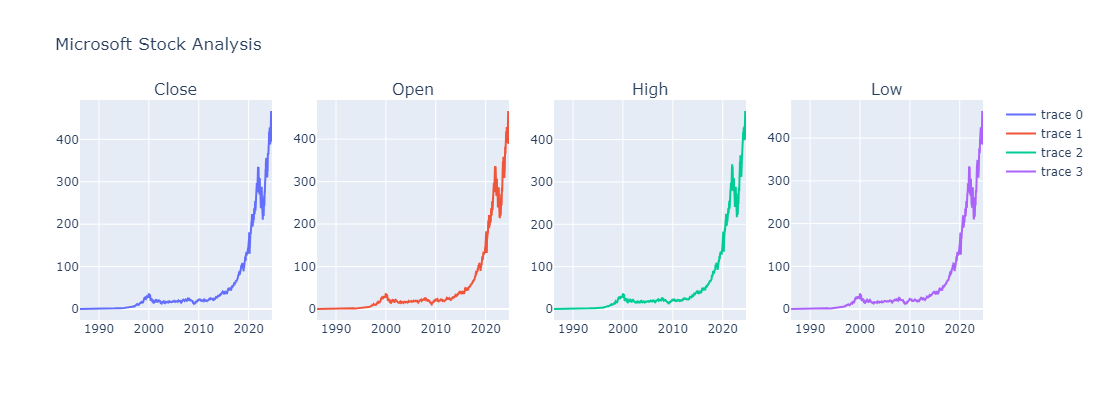

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

msft = yf.Ticker("MSFT")
hist = msft.history(period="max")

fig = make_subplots(rows=1, cols=4, subplot_titles=['Close', 'Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=hist.index, y=hist['Close']), row=1, col=1)
fig.add_trace(go.Scatter(x=hist.index, y=hist['Open']), row=1, col=2)
fig.add_trace(go.Scatter(x=hist.index, y=hist['High']), row=1, col=3)
fig.add_trace(go.Scatter(x=hist.index, y=hist['Low']), row=1, col=4)

fig.update_layout(height=400, width=1200, title_text='Microsoft Stock Analysis')
fig.show()

In [18]:
# Create an instance of the FinancialAnalyzer class

analyzer = FinancialAnalyzer('AAPL', '2020-01-01', '2020-12-31')



In [19]:
# Retrieve stock data
stock_data = analyzer.retrieve_stock_data()
stock_data


[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.876106   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.167603   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.742653   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.400566   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.565193   
...                ...         ...         ...         ...         ...   
2020-12-23  132.160004  132.429993  130.779999  130.960007  128.200790   
2020-12-24  131.320007  133.460007  131.100006  131.970001  129.189484   
2020-12-28  133.990005  137.339996  133.509995  136.690002  133.810074   
2020-12-29  138.050003  138.789993  134.339996  134.869995  132.028397   
2020-12-30  135.580002  135.990005  133.399994  133.720001  130.902649   

               Volume  
Date                   
2020-01-02  135480400  
2020-01-03  146322800  
2020-01-06  118387200  
2020-01-07  108872000  
2020-01-08  132079200  
...               ...  
2020-12-23   88223700  
2020-12-24   54930100  
2020-12-28  124486200  
2020-12-29  121047300  
2020-12-30   96452100  

[252 rows x 6 columns]

In [28]:
import talib as ta

class FinancialAnalyzer:
    # Other methods...

    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    def calculate_technical_indicators(self, data):
        # Calculate various technical indicators
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        # Return the DataFrame with the calculated indicators
        return data

# Assuming you have already loaded your stock data into a DataFrame named `stock_data`

# Initialize the FinancialAnalyzer
analyzer = FinancialAnalyzer()

# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)

# Display the last few rows of the DataFrame with the calculated indicators
print(stock_data_indicators.tail())



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-23  132.160004  132.429993  130.779999  130.960007  128.200790   
2020-12-24  131.320007  133.460007  131.100006  131.970001  129.189484   
2020-12-28  133.990005  137.339996  133.509995  136.690002  133.810074   
2020-12-29  138.050003  138.789993  134.339996  134.869995  132.028397   
2020-12-30  135.580002  135.990005  133.399994  133.720001  130.902649   

               Volume         SMA        RSI         EMA      MACD  \
Date                                                                 
2020-12-23   88223700  124.106000  66.417825  124.898504  3.154518   
2020-12-24   54930100  124.903000  67.866386  125.571980  3.323474   
2020-12-28  124486200  125.908001  73.597952  126.630839  3.794496   
2020-12-29  121047300  126.699000  68.522632  127.415521  3.975103   
2020-12-30   96452100  127.249000  65.451324  128.015948  3.9

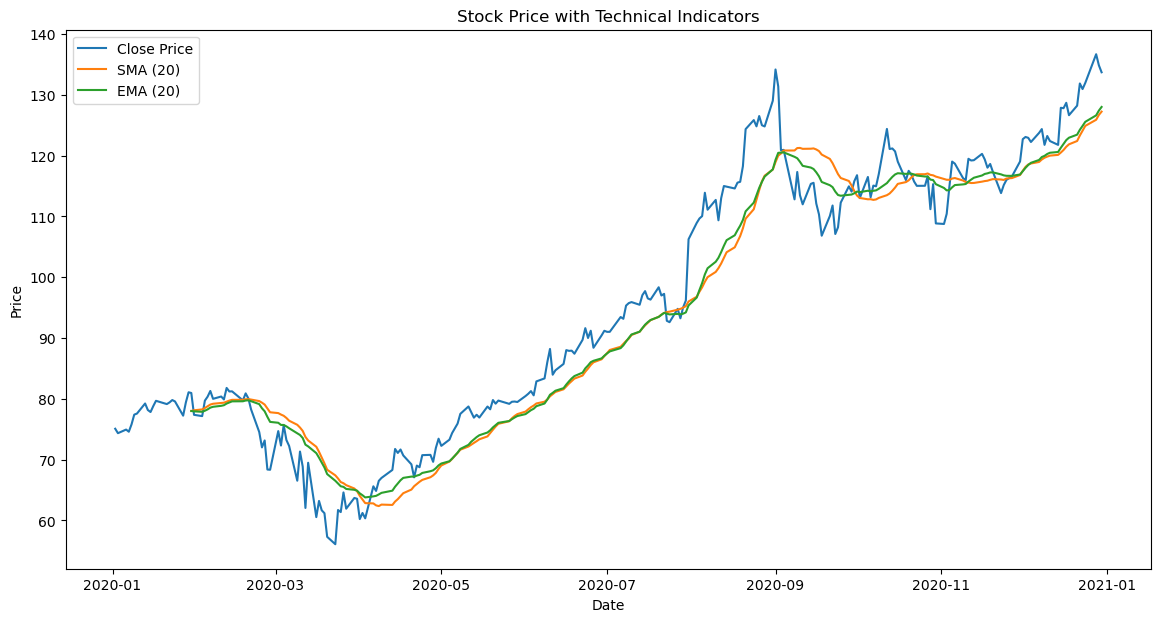

In [30]:
import talib as ta
import matplotlib.pyplot as plt

class FinancialAnalyzer:
    # Other methods...

    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    def calculate_technical_indicators(self, data):
        # Calculate various technical indicators
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        # Return the DataFrame with the calculated indicators
        return data

    def plot_stock_data(self, data):
        # Plot the stock price and technical indicators
        plt.figure(figsize=(14, 7))

        # Plot the closing price and moving averages
        plt.plot(data.index, data['Close'], label='Close Price')
        plt.plot(data.index, data['SMA'], label='SMA (20)')
        plt.plot(data.index, data['EMA'], label='EMA (20)')

        # Adding titles and labels
        plt.title('Stock Price with Technical Indicators')
        plt.xlabel('Date')
        plt.ylabel('Price')

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()

# Assuming you have already loaded your stock data into a DataFrame named `stock_data`

# Initialize the FinancialAnalyzer
analyzer = FinancialAnalyzer()

# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)

# Plot stock data with indicators
analyzer.plot_stock_data(stock_data_indicators)


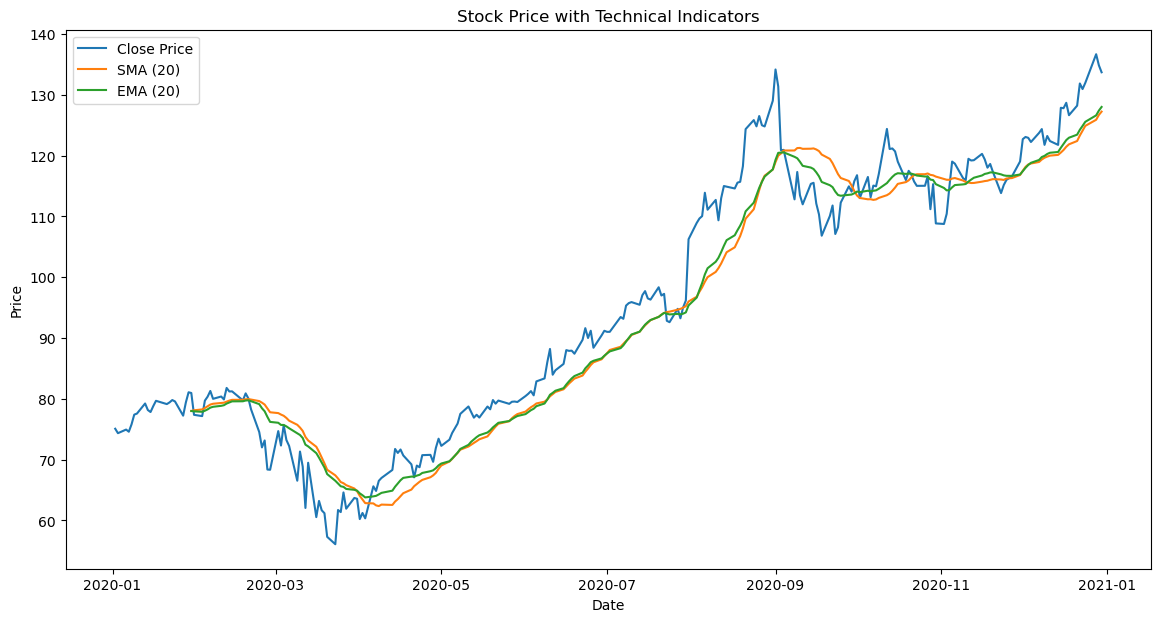

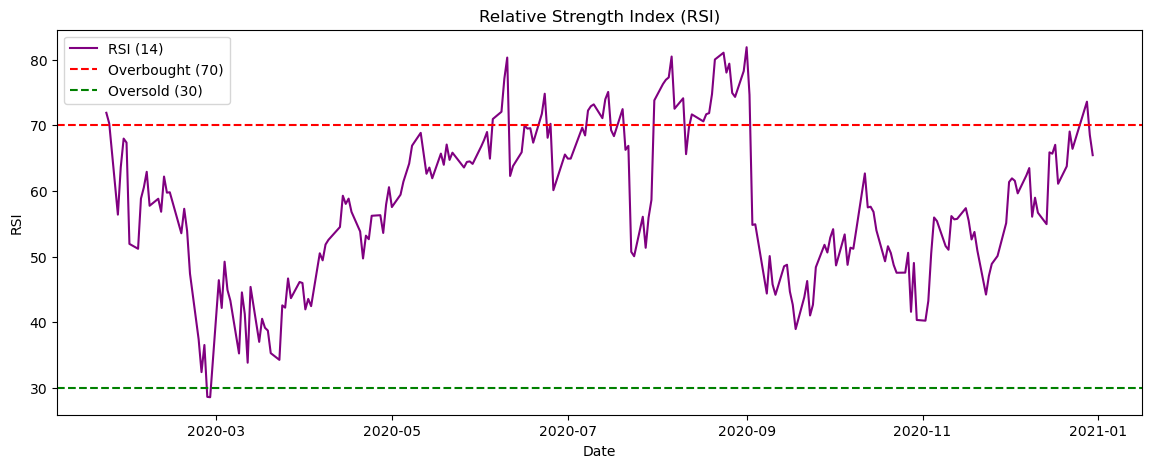

In [32]:
import talib as ta
import matplotlib.pyplot as plt

class FinancialAnalyzer:
    # Other methods...

    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    def calculate_technical_indicators(self, data):
        # Calculate various technical indicators
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        # Return the DataFrame with the calculated indicators
        return data

    def plot_stock_data(self, data):
        # Plot the stock price and technical indicators
        plt.figure(figsize=(14, 7))

        # Plot the closing price and moving averages
        plt.plot(data.index, data['Close'], label='Close Price')
        plt.plot(data.index, data['SMA'], label='SMA (20)')
        plt.plot(data.index, data['EMA'], label='EMA (20)')

        # Adding titles and labels
        plt.title('Stock Price with Technical Indicators')
        plt.xlabel('Date')
        plt.ylabel('Price')

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()

    def plot_rsi(self, data):
        # Plot the RSI (Relative Strength Index)
        plt.figure(figsize=(14, 5))

        # Plot the RSI line
        plt.plot(data.index, data['RSI'], label='RSI (14)', color='purple')

        # Add horizontal lines for the overbought and oversold levels
        plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
        plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

        # Adding titles and labels
        plt.title('Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI')

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()

# Assuming you have already loaded your stock data into a DataFrame named `stock_data`

# Initialize the FinancialAnalyzer
analyzer = FinancialAnalyzer()

# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)

# Plot stock data with indicators
analyzer.plot_stock_data(stock_data_indicators)

# Plot RSI
analyzer.plot_rsi(stock_data_indicators)




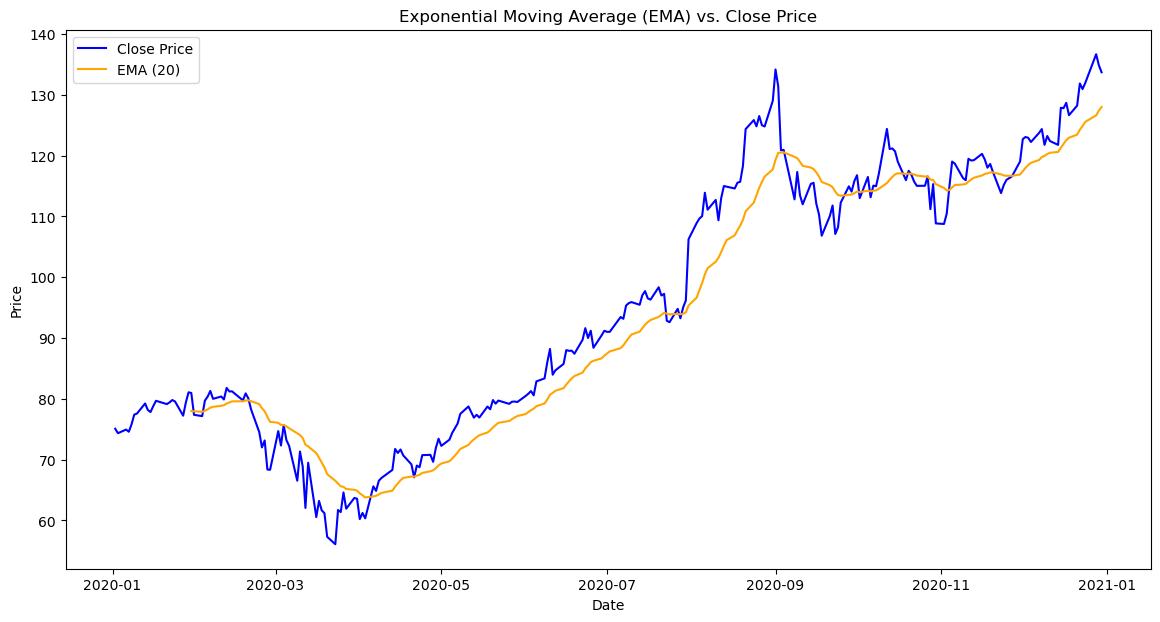

In [34]:
import talib as ta
import matplotlib.pyplot as plt

class FinancialAnalyzer:
    # Other methods...

    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    def calculate_technical_indicators(self, data):
        # Calculate various technical indicators
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        # Return the DataFrame with the calculated indicators
        return data

    def plot_stock_data(self, data):
        # Plot the stock price and technical indicators
        plt.figure(figsize=(14, 7))

        # Plot the closing price and moving averages
        plt.plot(data.index, data['Close'], label='Close Price')
        plt.plot(data.index, data['SMA'], label='SMA (20)')
        plt.plot(data.index, data['EMA'], label='EMA (20)')

        # Adding titles and labels
        plt.title('Stock Price with Technical Indicators')
        plt.xlabel('Date')
        plt.ylabel('Price')

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()

    def plot_rsi(self, data):
        # Plot the RSI (Relative Strength Index)
        plt.figure(figsize=(14, 5))

        # Plot the RSI line
        plt.plot(data.index, data['RSI'], label='RSI (14)', color='purple')

        # Add horizontal lines for the overbought and oversold levels
        plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
        plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

        # Adding titles and labels
        plt.title('Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI')

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()

    def plot_ema(self, data):
        # Plot the Exponential Moving Average (EMA)
        plt.figure(figsize=(14, 7))

        # Plot the EMA and close price
        plt.plot(data.index, data['Close'], label='Close Price', color='blue')
        plt.plot(data.index, data['EMA'], label='EMA (20)', color='orange')

        # Adding titles and labels
        plt.title('Exponential Moving Average (EMA) vs. Close Price')
        plt.xlabel('Date')
        plt.ylabel('Price')

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()

# Assuming you have already loaded your stock data into a DataFrame named `stock_data`

# Initialize the FinancialAnalyzer
analyzer = FinancialAnalyzer()

# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)

# Plot EMA
analyzer.plot_ema(stock_data_indicators)




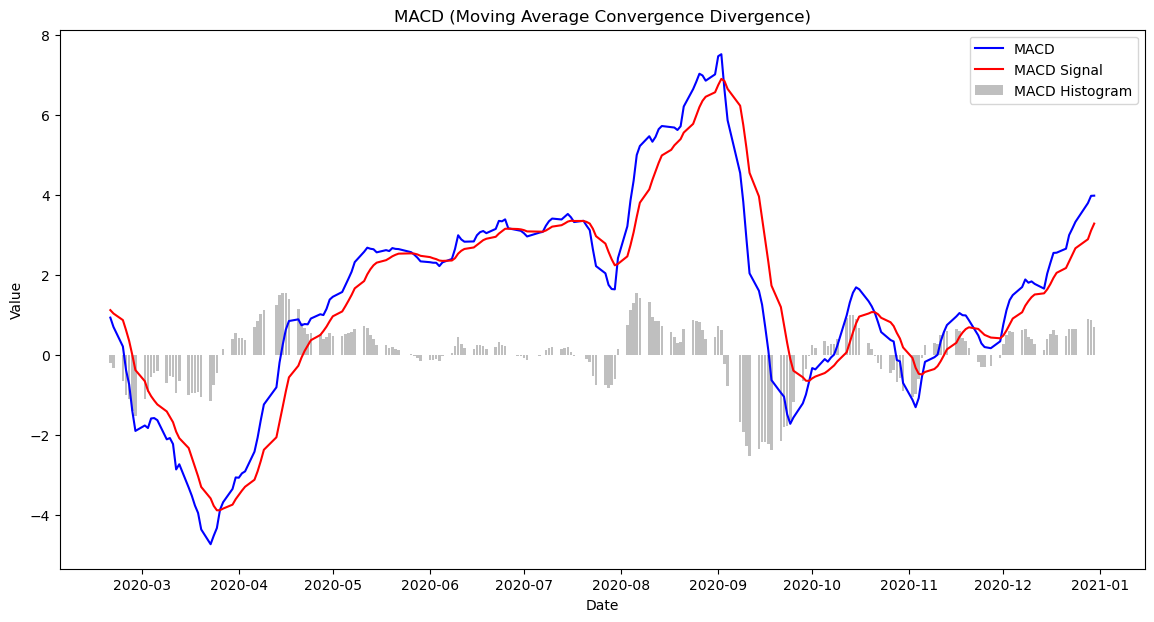

In [38]:
import talib as ta
import matplotlib.pyplot as plt

class FinancialAnalyzer:
    # Method to calculate moving averages
    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    # Method to calculate various technical indicators
    def calculate_technical_indicators(self, data):
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        return data

    # Method to plot MACD
    def plot_macd(self, data):
        plt.figure(figsize=(14, 7))

        # Plot MACD and MACD Signal lines
        plt.plot(data.index, data['MACD'], label='MACD', color='blue')
        plt.plot(data.index, data['MACD_signal'], label='MACD Signal', color='red')

        # Bar plot for the MACD Histogram
        plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.5)

        # Adding titles and labels
        plt.title('MACD (Moving Average Convergence Divergence)')
        plt.xlabel('Date')
        plt.ylabel('Value')

        # Show the legend
        plt.legend()

        # Show the plot
        plt.show()

# Assuming you have already loaded your stock data into a DataFrame named `stock_data`

# Initialize the FinancialAnalyzer
analyzer = FinancialAnalyzer()

# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)

# Plot MACD
analyzer.plot_macd(stock_data_indicators)


## Portifolio Analysis

[*********************100%***********************]  1 of 1 completed


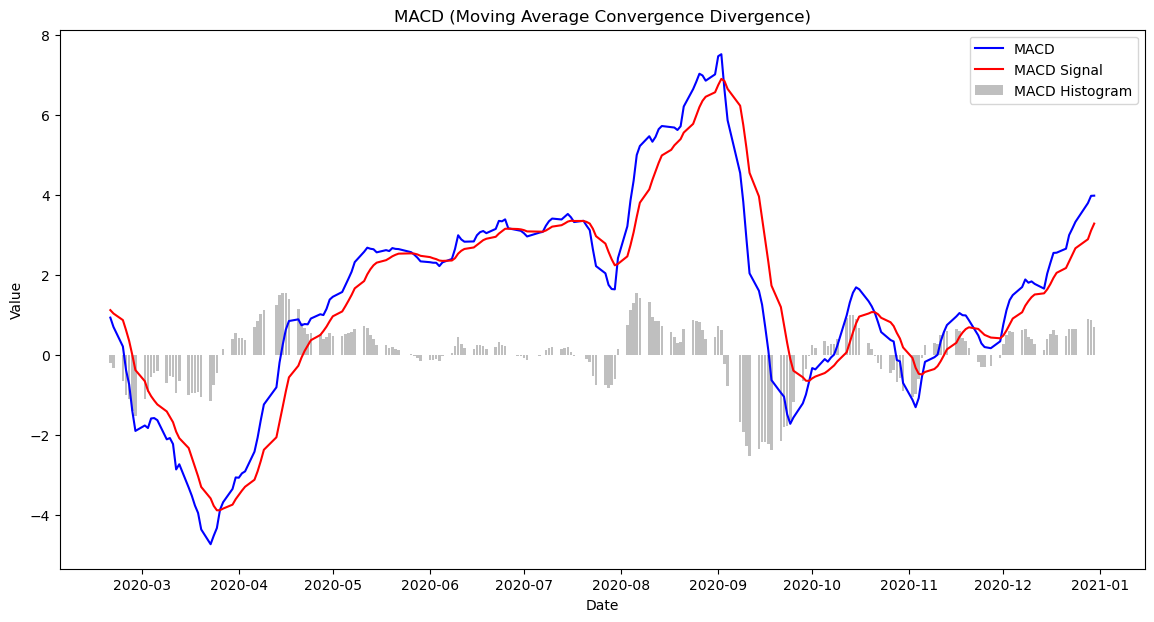

In [40]:
import talib as ta
import matplotlib.pyplot as plt
import yfinance as yf

class FinancialAnalyzer:
    def __init__(self, stock_symbol, start_date, end_date):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date
        self.stock_data = self.load_stock_data()

    def load_stock_data(self):
        # Load stock data using yfinance
        data = yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)
        return data

    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    def calculate_technical_indicators(self, data):
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        return data

    def plot_macd(self, data):
        plt.figure(figsize=(14, 7))
        plt.plot(data.index, data['MACD'], label='MACD', color='blue')
        plt.plot(data.index, data['MACD_signal'], label='MACD Signal', color='red')
        plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.5)
        plt.title('MACD (Moving Average Convergence Divergence)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

# Create an instance of the FinancialAnalyzer class
analyzer = FinancialAnalyzer('AAPL', '2020-01-01', '2020-12-31')

# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(analyzer.stock_data)

# Plot MACD
analyzer.plot_macd(stock_data_indicators)


In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
import talib as ta

class FinancialAnalyzer:
    def __init__(self, stock_symbol=None, start_date=None, end_date=None):
        if stock_symbol and start_date and end_date:
            self.stock_symbol = stock_symbol
            self.start_date = start_date
            self.end_date = end_date
            self.stock_data = self.load_stock_data()

    def load_stock_data(self):
        # Load stock data using yfinance
        data = yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)
        return data

    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    def calculate_technical_indicators(self, data):
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        return data

    def plot_macd(self, data):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(14, 7))
        plt.plot(data.index, data['MACD'], label='MACD', color='blue')
        plt.plot(data.index, data['MACD_signal'], label='MACD Signal', color='red')
        plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.5)
        plt.title('MACD (Moving Average Convergence Divergence)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

    def calculate_portfolio_weights(self, stock_symbols, start_date, end_date):
        # Download data for each stock and calculate daily returns
        stock_data = yf.download(stock_symbols, start=start_date, end=end_date)['Adj Close']
        returns = stock_data.pct_change().dropna()

        # Example strategy: Equal weight for each stock
        equal_weights = np.array([1.0 / len(stock_symbols)] * len(stock_symbols))
        
        # Mean returns
        mean_returns = returns.mean()
        
        # Covariance matrix of returns
        cov_matrix = returns.cov()

        # Example strategy: Mean-variance optimization (using equal weights as placeholder)
        portfolio_weights = equal_weights  # For now, using equal weights

        # Convert to a Pandas Series with stock symbols as index
        portfolio_weights_series = pd.Series(portfolio_weights, index=stock_symbols)
        return portfolio_weights_series

# Example usage:
analyzer = FinancialAnalyzer()

# Calculate portfolio weights
weights = analyzer.calculate_portfolio_weights(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(weights)


[*********************100%***********************]  3 of 3 completed

AAPL    0.333333
GOOG    0.333333
MSFT    0.333333
dtype: float64


In [42]:
import numpy as np
import pandas as pd
import yfinance as yf
import talib as ta

class FinancialAnalyzer:
    def __init__(self, stock_symbol=None, start_date=None, end_date=None):
        if stock_symbol and start_date and end_date:
            self.stock_symbol = stock_symbol
            self.start_date = start_date
            self.end_date = end_date
            self.stock_data = self.load_stock_data()

    def load_stock_data(self):
        # Load stock data using yfinance
        data = yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)
        return data

    def calculate_moving_average(self, data, window_size):
        return ta.SMA(data, timeperiod=window_size)

    def calculate_technical_indicators(self, data):
        data['SMA'] = self.calculate_moving_average(data['Close'], 20)
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
        data['EMA'] = ta.EMA(data['Close'], timeperiod=20)
        data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)
        return data

    def plot_macd(self, data):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(14, 7))
        plt.plot(data.index, data['MACD'], label='MACD', color='blue')
        plt.plot(data.index, data['MACD_signal'], label='MACD Signal', color='red')
        plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.5)
        plt.title('MACD (Moving Average Convergence Divergence)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

    def calculate_portfolio_weights(self, stock_symbols, start_date, end_date):
        # Download data for each stock and calculate daily returns
        stock_data = yf.download(stock_symbols, start=start_date, end=end_date)['Adj Close']
        returns = stock_data.pct_change().dropna()

        # Example strategy: Equal weight for each stock
        equal_weights = np.array([1.0 / len(stock_symbols)] * len(stock_symbols))
        
        # Mean returns
        mean_returns = returns.mean()
        
        # Covariance matrix of returns
        cov_matrix = returns.cov()

        # Example strategy: Mean-variance optimization (using equal weights as placeholder)
        portfolio_weights = equal_weights  # For now, using equal weights

        # Convert to a Pandas Series with stock symbols as index
        portfolio_weights_series = pd.Series(portfolio_weights, index=stock_symbols)
        return portfolio_weights_series

    def calculate_portfolio_performance(self, stock_symbols, start_date, end_date):
        # Get portfolio weights
        weights = self.calculate_portfolio_weights(stock_symbols, start_date, end_date)
        
        # Download data for each stock and calculate daily returns
        stock_data = yf.download(stock_symbols, start=start_date, end=end_date)['Adj Close']
        returns = stock_data.pct_change().dropna()

        # Calculate weighted returns for the portfolio
        weighted_returns = returns.mul(weights, axis=1)
        portfolio_returns = weighted_returns.sum(axis=1)

        # Calculate cumulative returns
        cumulative_returns = (1 + portfolio_returns).cumprod() - 1

        # Calculate portfolio risk (standard deviation of returns)
        portfolio_risk = portfolio_returns.std()

        # Calculate average return
        average_return = portfolio_returns.mean()

        # Annualize return and risk
        annualized_return = average_return * 252  # Assuming 252 trading days in a year
        annualized_risk = portfolio_risk * np.sqrt(252)

        # Prepare the performance summary
        performance_summary = {
            'Annualized Return': annualized_return,
            'Annualized Risk (Volatility)': annualized_risk,
            'Cumulative Return': cumulative_returns[-1]
        }

        return performance_summary

# Example usage:
analyzer = FinancialAnalyzer()

# Calculate portfolio performance
performance = analyzer.calculate_portfolio_performance(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(performance)


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
C:\Users\user\AppData\Local\Temp\ipykernel_26360\2500550714.py:94: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



{'Annualized Return': 0.4814872767826061, 'Annualized Risk (Volatility)': 0.40342950554060164, 'Cumulative Return': 0.48894009074408507}


In [14]:
# weights = analyzer.calculate_portfolio_weights(['AMZN', 'META', 'TSLA'], '2020-01-01', '2020-12-31')
# print(weights)

In [43]:
import numpy as np
import pandas as pd
import yfinance as yf

class FinancialAnalyzer:
    def __init__(self, stock_symbol=None, start_date=None, end_date=None):
        if stock_symbol and start_date and end_date:
            self.stock_symbol = stock_symbol
            self.start_date = start_date
            self.end_date = end_date
            self.stock_data = self.load_stock_data()

    def load_stock_data(self):
        # Load stock data using yfinance
        data = yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)
        return data

    def calculate_portfolio_weights(self, stock_symbols, start_date, end_date):
        # Download data for each stock and calculate daily returns
        stock_data = yf.download(stock_symbols, start=start_date, end=end_date)['Adj Close']
        returns = stock_data.pct_change().dropna()

        # Example strategy: Equal weight for each stock
        equal_weights = np.array([1.0 / len(stock_symbols)] * len(stock_symbols))
        
        # Convert to a Pandas Series with stock symbols as index
        portfolio_weights_series = pd.Series(equal_weights, index=stock_symbols)
        return portfolio_weights_series

    def calculate_portfolio_performance(self, stock_symbols, start_date, end_date):
        # Get portfolio weights
        weights = self.calculate_portfolio_weights(stock_symbols, start_date, end_date)
        
        # Download data for each stock and calculate daily returns
        stock_data = yf.download(stock_symbols, start=start_date, end=end_date)['Adj Close']
        returns = stock_data.pct_change().dropna()

        # Calculate weighted returns for the portfolio
        weighted_returns = returns.mul(weights, axis=1)
        portfolio_returns = weighted_returns.sum(axis=1)

        # Calculate annualized portfolio return
        annualized_return = portfolio_returns.mean() * 252 * 100  # Percent return

        # Calculate annualized portfolio volatility (risk)
        portfolio_volatility = portfolio_returns.std() * np.sqrt(252) * 100  # Percent volatility

        # Calculate Sharpe ratio (assuming risk-free rate is 0)
        sharpe_ratio = annualized_return / portfolio_volatility

        return annualized_return, portfolio_volatility, sharpe_ratio

# Example usage:
analyzer = FinancialAnalyzer()

# Calculate portfolio performance
portfolio_return, portfolio_volatility, sharpe_ratio = analyzer.calculate_portfolio_performance(
    ['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31'
)

# Display the results
print(f"Portfolio Return: {portfolio_return:.2f}%")
print(f"Portfolio Volatility: {portfolio_volatility:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed

Portfolio Return: 48.15%
Portfolio Volatility: 40.34%
Sharpe Ratio: 1.19
